In [1]:
from pylab import rcParams
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.figsize'] = (8, 5)

In [3]:
df = pd.read_csv('./../../data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df = df.dropna()
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')
df.shape

(6825, 16)

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]

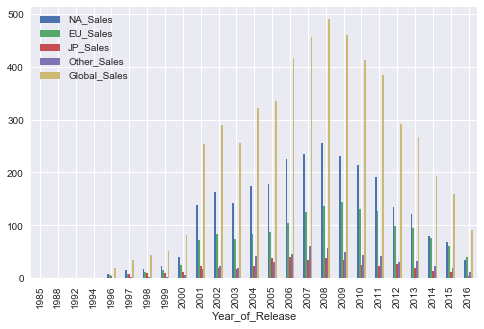

In [7]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby(['Year_of_Release']).sum().plot(kind='bar')

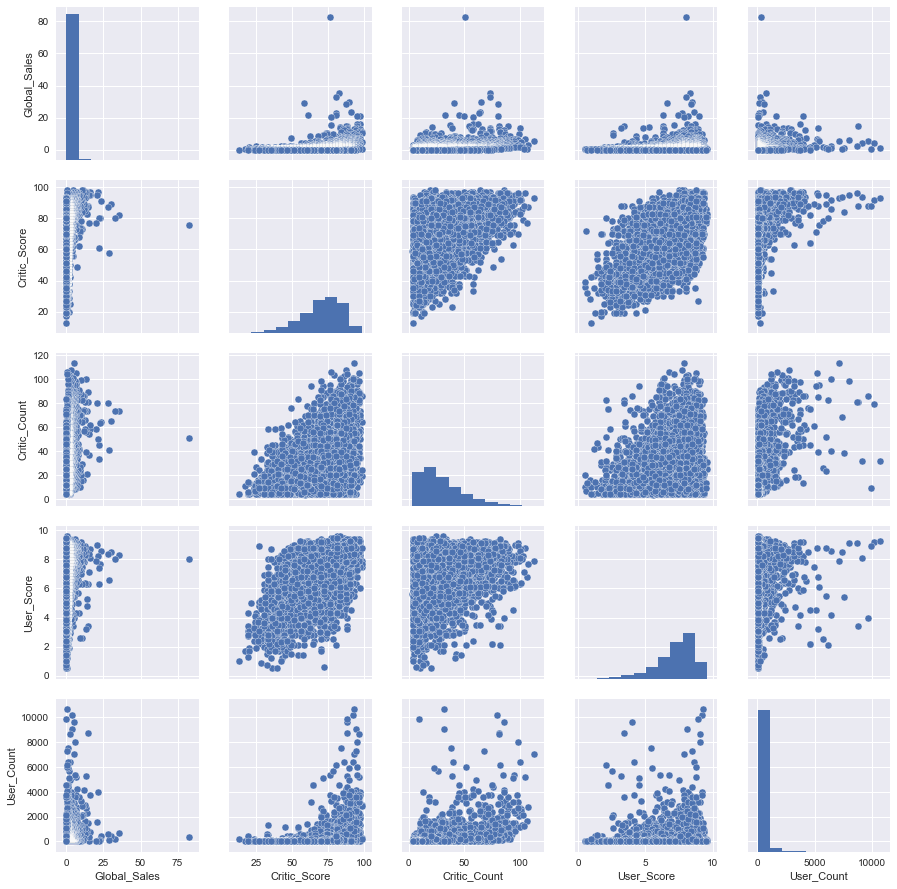

In [8]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])

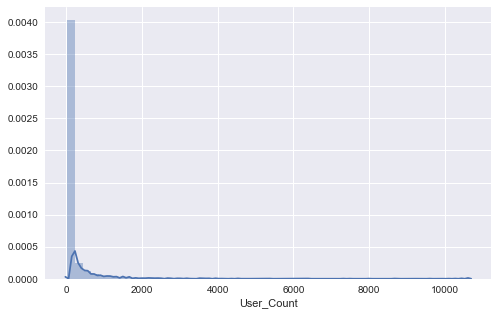

In [9]:
sns.distplot(df['User_Count'])

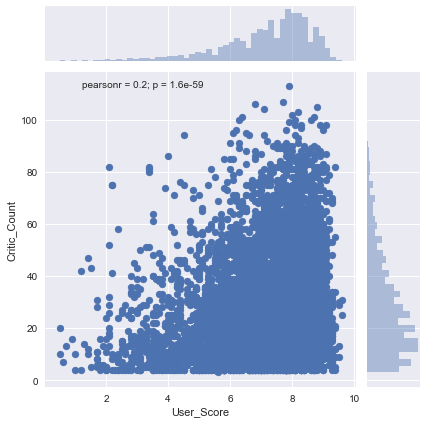

In [10]:
sns.jointplot(df['User_Score'], df['Critic_Count'])

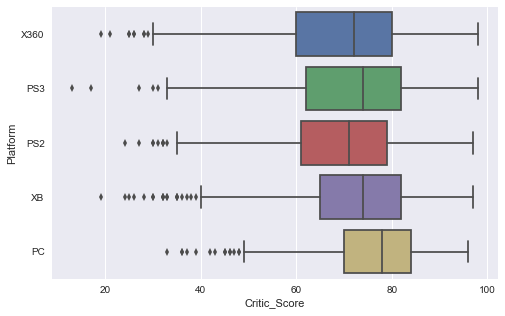

In [11]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).index[:5]
sns.boxplot(y='Platform', x='Critic_Score', data=df[df['Platform'].isin(top_platforms)])

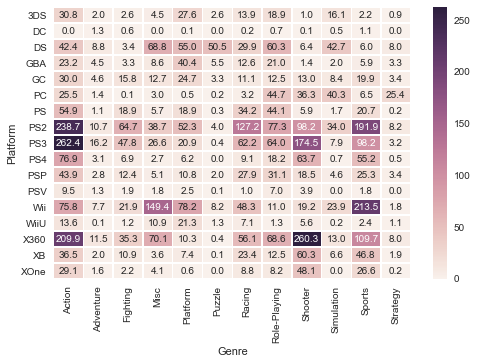

In [12]:
platform_genre_sales = df.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [14]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [15]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df

,Global_Sales,Name
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


In [16]:
line1 = go.Scatter(x = years_df.index, y = years_df['Global_Sales'], name='Global sales')
line2 = go.Scatter(x = years_df.index, y = years_df['Name'], name='Number of games')

In [17]:
data = [line1, line2]
layout = {'title': 'Statistics of video games'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

In [18]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(df.groupby('Platform')[['Name']].count())
line1 = go.Bar(x = platforms_df.index, y = platforms_df['Global_Sales'], name='Global sales')
line2 = go.Bar(x = platforms_df.index, y = platforms_df['Name'], name='Number of games')

In [19]:
data = [line1, line2]
layout = {'title': 'Statistics of video games'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

In [20]:
data = []
for genre in df['Genre'].unique():
    data.append(go.Box(x = df[df['Genre'] == genre]['Critic_Score'], name = genre ))
iplot(data)

In [21]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [22]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [28]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

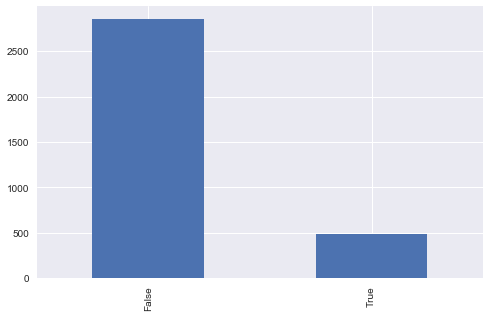

In [30]:
df['Churn'].value_counts().plot(kind='bar')

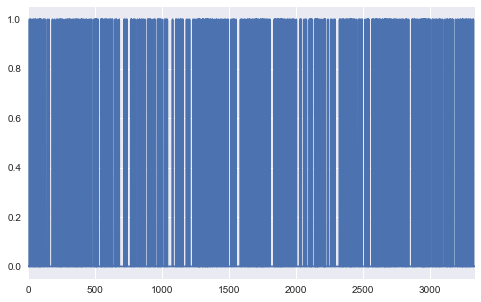

In [29]:
df['Churn'].plot()

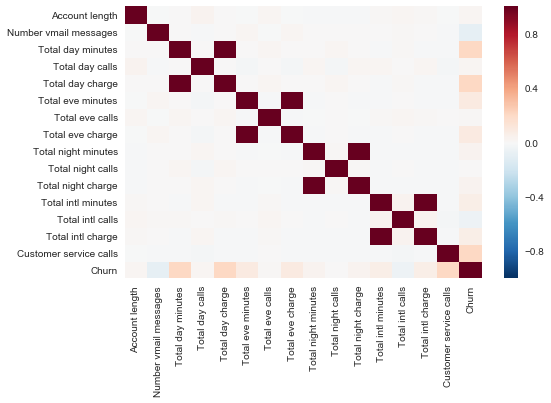

In [32]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()
sns.heatmap(corr_matrix)

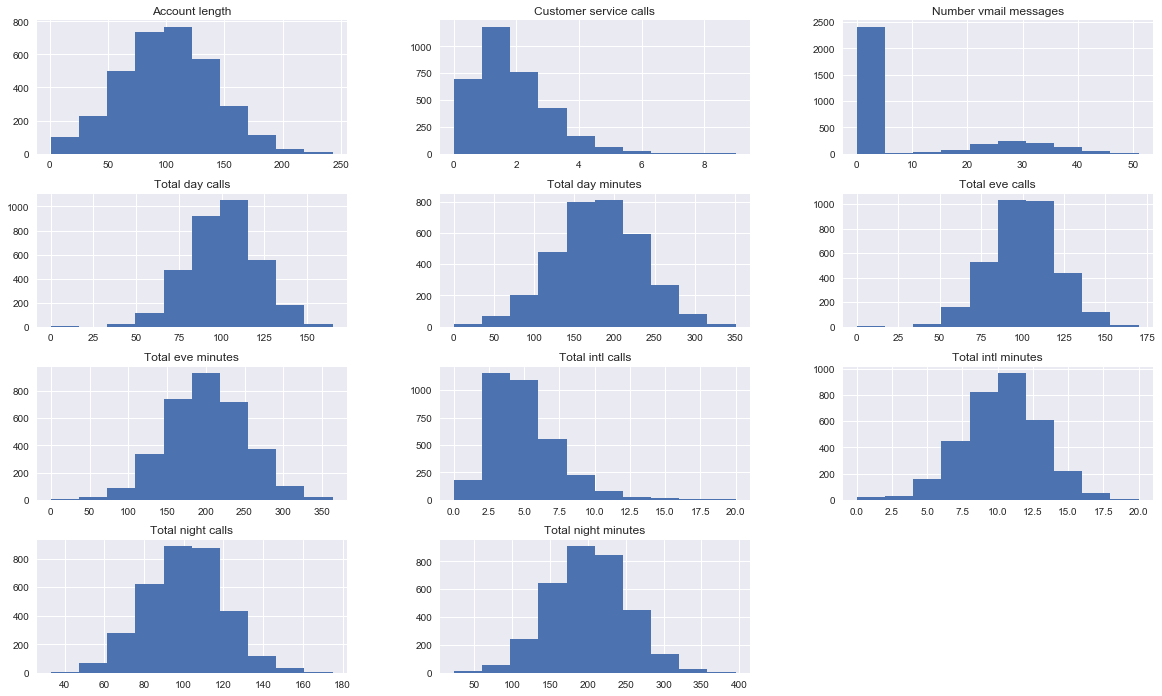

In [34]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge', 'Total eve charge', 'Total night charge',
                                        'Total intl charge', 'Churn']))
df[features].hist(figsize=(20,12));

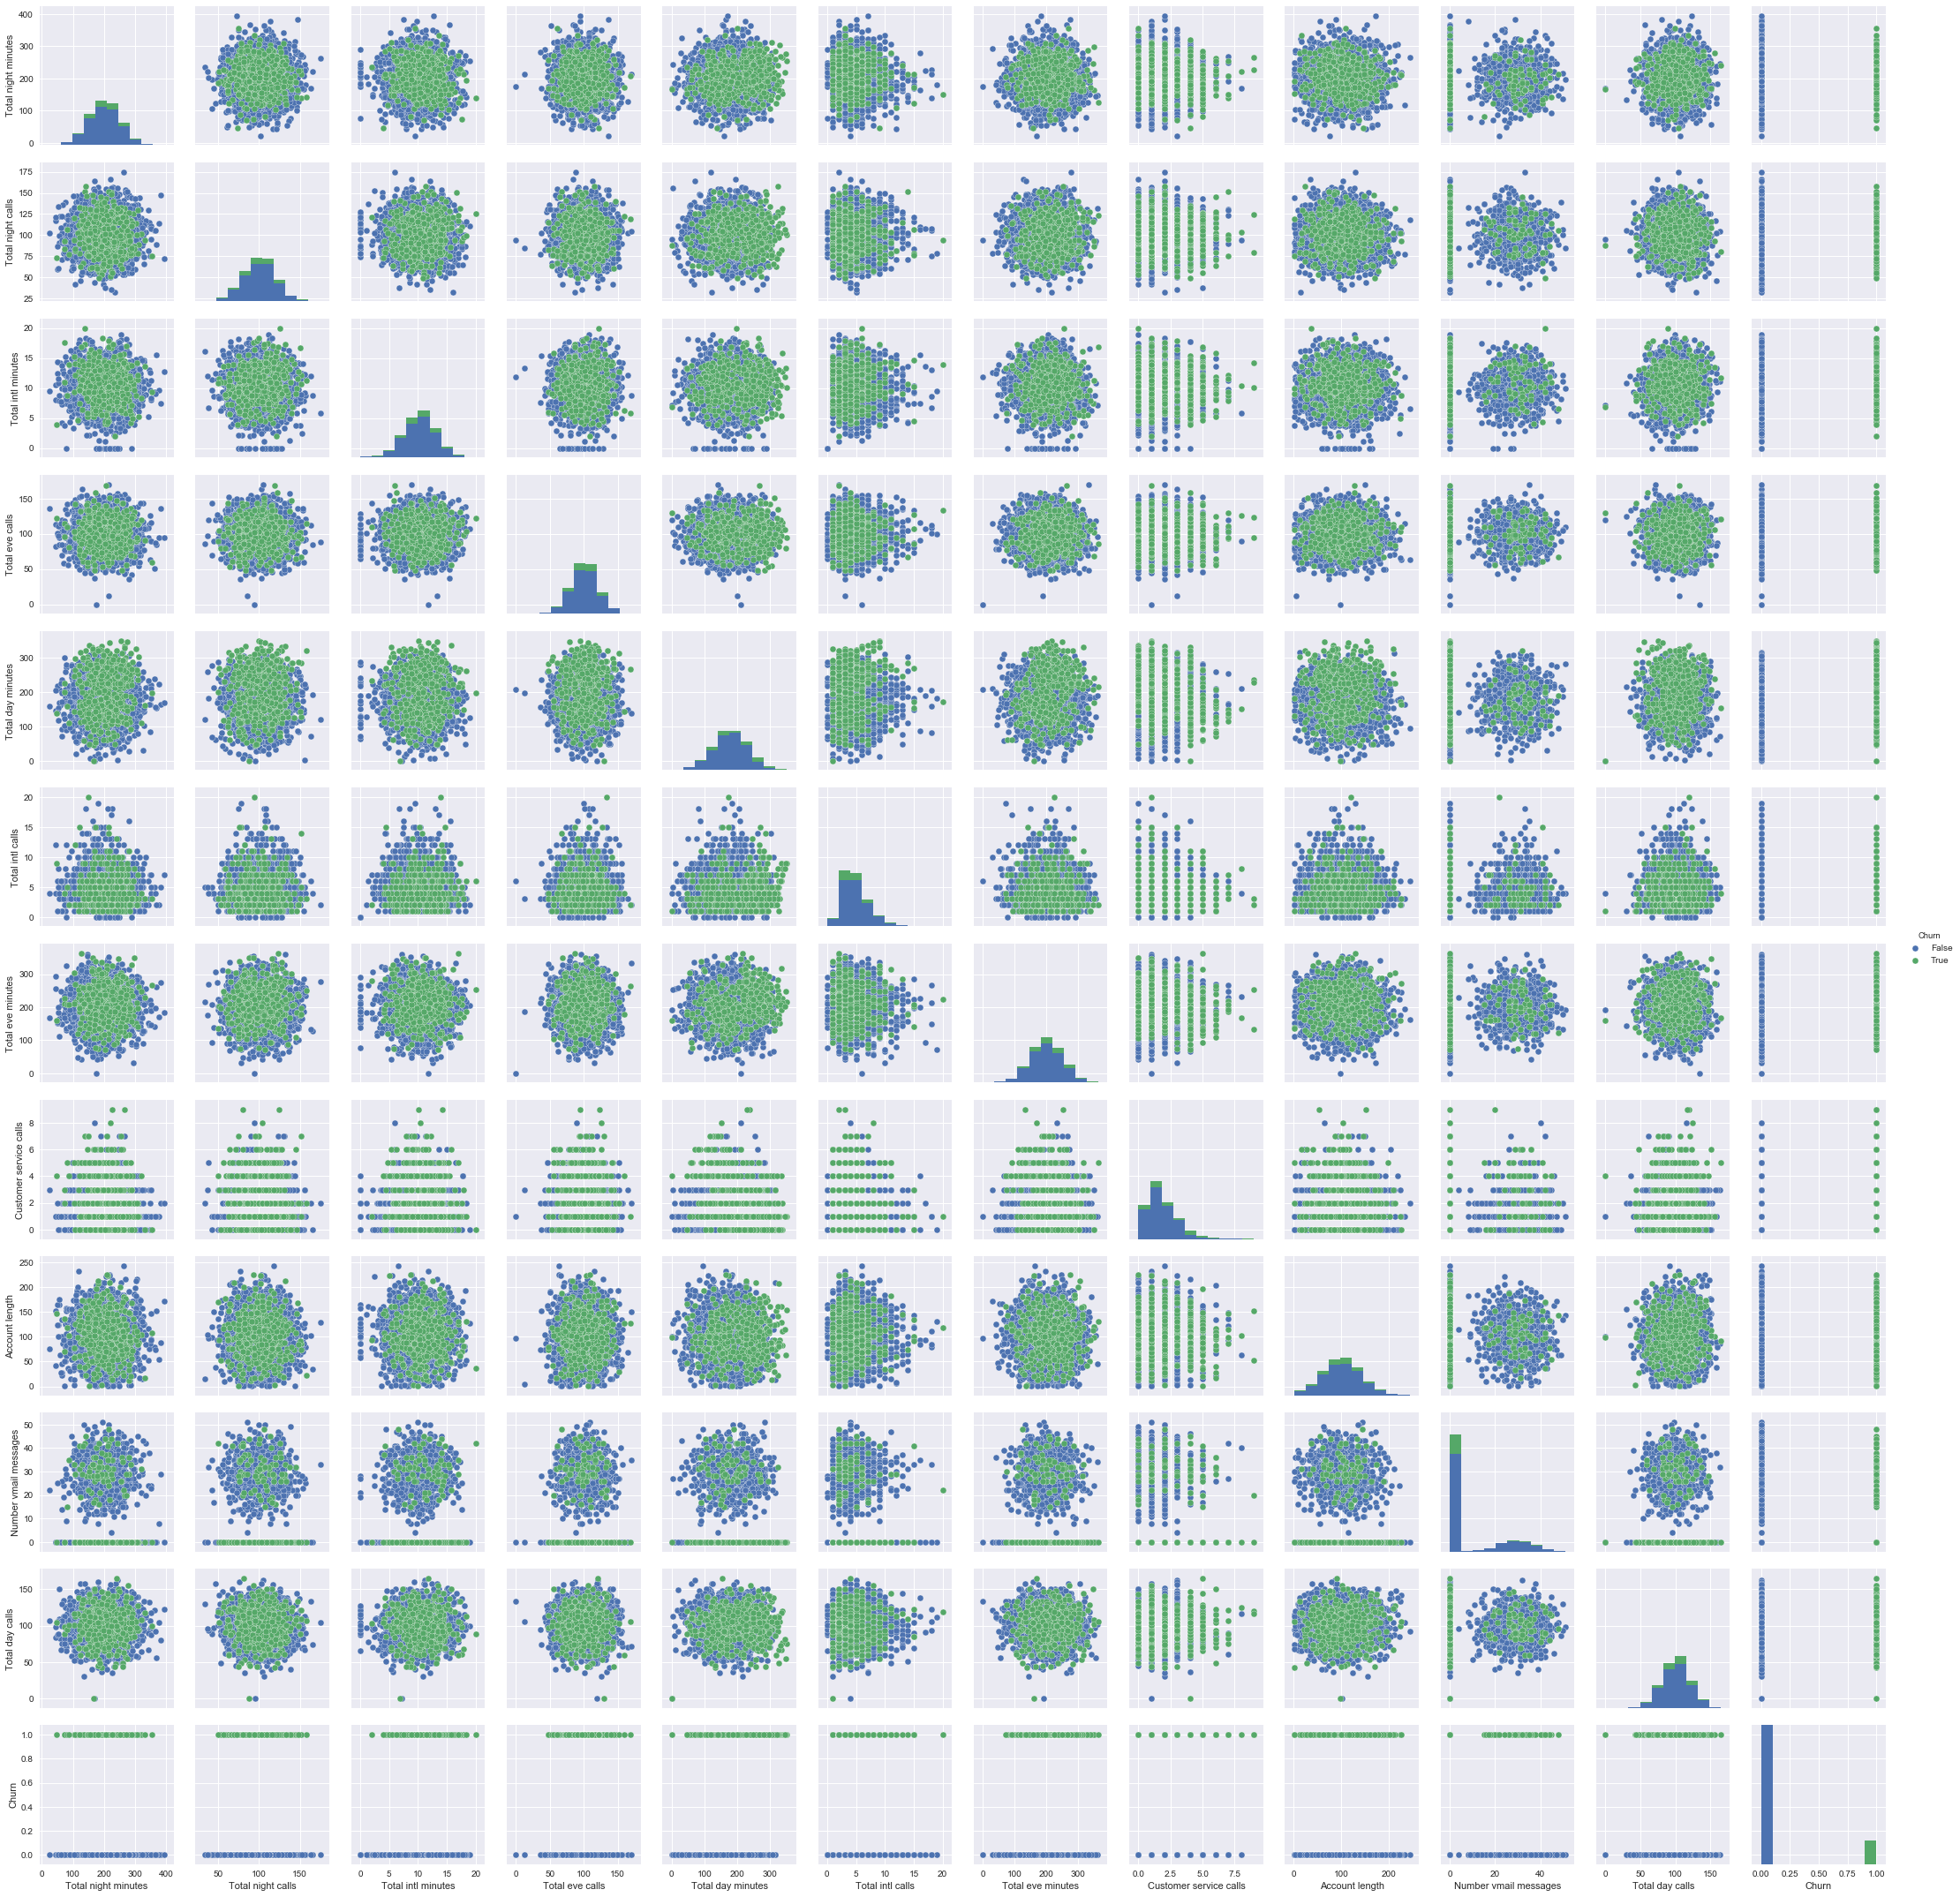

In [37]:
sns.pairplot(df[features + ['Churn']], hue='Churn');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



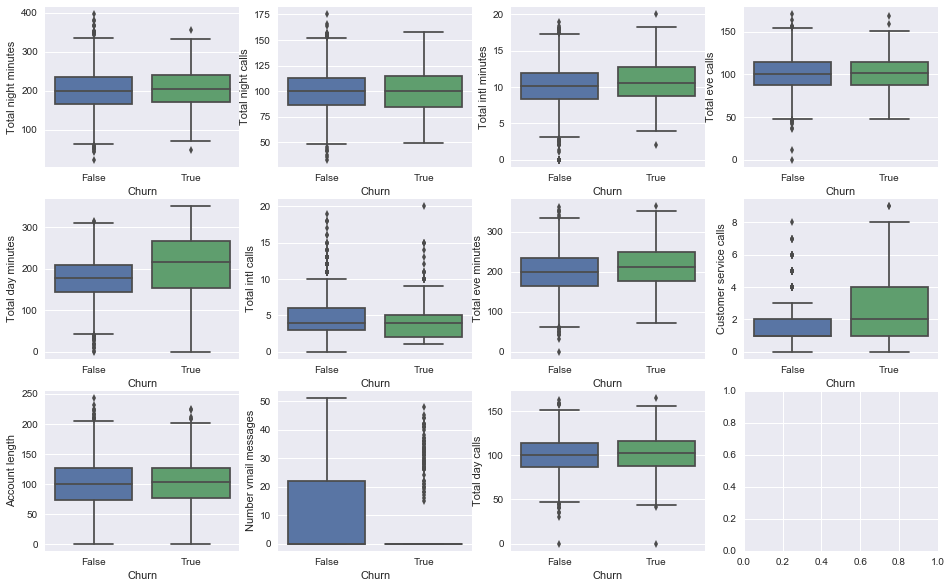

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('Churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);

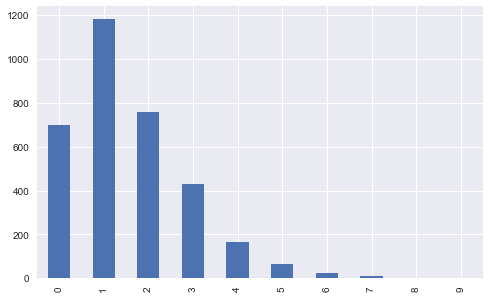

In [57]:
df['Customer service calls'].value_counts().sort_index().plot(kind='bar')

,Customer service calls
Churn,
False,1.449825
True,2.229814


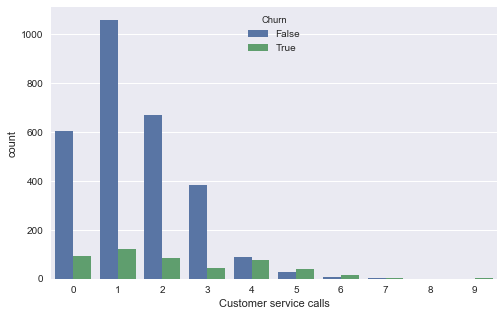

In [60]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

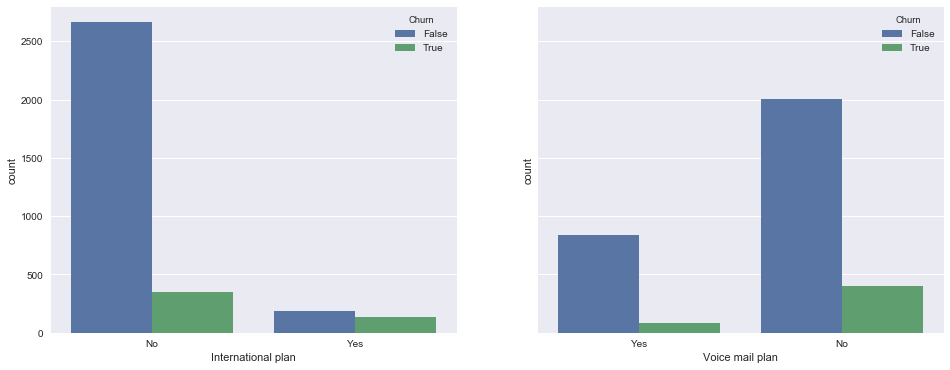

In [66]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);